## Gunosy Summer Internship 2017 データ分析コース

In [1]:
from IPython.display import Image
Image(url='https://images.gunosy.com/logo/gunosy_logo.jpg')

## この教科書について
-----

### 目的

今回のインターンシップでは, Gunosyの様々なプロダクトで日々蓄積されている大量のデータを駆使しながら Gunosyで実際に適用されうる, 生かされる課題を分析し課題解決に取り組んでいただきます.<br>
皆さまがより有意義な3日間になるよう, あらかじめ今回のインターンシップに参加するにあたり必要な知識・プログラミングについて, 本ノートブックにまとめました.
インターンシップ前にこの教科書を参考にしっかりと準備しておいてください.<br>さらに, 練習問題を設けているのでぜひ挑戦してみてください！

### この教科書で学ぶこと
- データ分析ライブラリである `pandas` `numpy` `scikit-learn` に慣れる
- 機械学習モデルの生成及び評価までの一連の流れを体得する

### 使用するパッケージ
- Python==3.5.2
- IPython==5.1.0
- numpy==1.11.2
- pandas==0.20.1
- matplotlib==2.0.2
- seaborn==0.7.1

## 本題 
----

### 題材 : クレジットカードの不正検出

データ分析コンペティションサイトである **[Kaggle](https://www.kaggle.com/)**にて公開されている<br>
**[Credit Card Fraud Detection](https://www.kaggle.com/dalpozz/creditcardfraud)**を題材として, データ分析に関する一連の流れを説明していきます<br>
#### ※  インターンシップ本番は別の題材です


### 目次
0. バックグラウンド
1. 必要なライブラリのimport, データの読み込み
2. データの可視化
3. データの整形
    - 特徴量の選択/変換
    - 不均衡性への対処
4. モデルの作成と精度評価
5. 作成したモデルによる新データの分類
5. 終わりに
-----

## 1. バックグラウンド

ICカードの普及により, クレジットカートの不正利用が年々増加しています. [日本クレジット協会](https://www.google.co.jp/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwiE4K_kor_VAhWBVLwKHSZSAFoQFggmMAA&url=http%3A%2F%2Fwww.j-credit.or.jp%2Finformation%2Fstatistics%2F&usg=AFQjCNHSx2VQtw8Uy8vH7YvcZVCsEI6ahQ) による調査報告によると, 2017年第1四半期におけるクレジットカードの不正使用被害額は, 前四半期の1.6倍を超える56億5000万円と報告されています. <br>
そのため, カード利用の頻度や額, 場所などの様々な情報からクレジットカードの不正検出技術の実現が期待されています. 今回はヨーロッパのある銀行がKaggle上で公開しているデータを元に, クレジットカード不正検出に挑戦してみましょう！

## 2. 必要なライブラリ・データの読み込み

#### まずはじめにデータ分析ライブラリである　pandas, numpy, sckit-lerarn, 可視化ライブラリである matplotlib, seabornをimportします 

In [2]:
# notebook上で可視化した図を表示するためのコマンド
%matplotlib inline

# ライブラリをimport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 次に, 今回利用するデータをダウンロードし, ノートブック上で読み込みます
 https://www.kaggle.com/dalpozz/creditcardfraud のdowanloadから, データをダウンロードします. <br>
 解凍すると `creditcard.csv` というcsvファイルがあるので, このノートブックと同じ階層のフォルダに配置しノートブック上で読み込みましょう. <br>
 ※ データのダウンロードにはKaggleのアカウントが必要ですので, 別途ご登録お願いします. <br> 

In [3]:
# csvファイルの読み込み
df = pd.read_csv('creditcard.csv')

# indexの新しい方から１０個表示してみます
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


__各カラムの説明を下記に引用します__

>It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot >provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained >with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed >between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for >example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

まとめると
- V1~V28はconfidentialな特徴量を[PCA](https://ja.wikipedia.org/wiki/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90) で変換された特徴量になっています(使用した場所や暗証番号を間違えた数, 登録者の属性などでしょうかね)
- `Time` は, データセットの中で一番最初の取引からの経過"秒数" を表しています
- `Amount` はクレジットカードの使用額
- `Class` は正解ラベルです. 1が不正利用, 0が通常取引を表しています

## 3. データの確認/可視化
いきなり機械学習モデルに適用してしまってはそのモデルが適切かは分からず, 良くありません. まずデータを可視化することで, どのような特徴・傾向があるかを調査しましょう

### データの確認

まずデータに欠損値や異常値がないかを確認します

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# 欠損している場合に True とする
missing = df.apply(pd.isnull, axis=0)
missing['count'] = 1
# 各カラムをGroup By することで, Trueの数(欠損しているレコード)を確認する
missing.groupby(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']).sum()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,284807


`True` が含まれているカラムは一つもないことから, 今回のデータは欠損しているレコードはなさそうです

次に, 各カラムの統計量を確認してみましょう

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


`describe` メソッドで簡単に各カラムの統計量を確認することができます.

__ここで注目してほしいのが, クラス変数に対応する`Class`カラムです. 二値分類問題のターゲットになる値の平均値が `0.001727` とかなりゼロに寄っていることが確認できます.__


__実際に`Class`カラムの 0,1それぞれの値をカウントしてみると, 非常に大きな差異があることがわかります__

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

このようなデータは [__不均衡データ__](http://ibisforest.org/index.php?%E4%B8%8D%E5%9D%87%E8%A1%A1%E3%83%87%E3%83%BC%E3%82%BF) と呼ばれ, 実世界における機械学習タスクで頻繁に登場し, 慎重に取り扱う必要があります.　<br>今回の取扱については後述します.


### データの可視化

次にデータの特徴・傾向を把握するために可視化を行っていきますが, その前にデータの行数を確認しましょう

In [8]:
len(df)

284807

約28万行と非常に多くのレコードがあることがわかります. この行数だと可視化に時間がかかってしまいます.<br>
すいすいとデータ傾向を把握するために, 一旦データをサンプリングしましょう.

In [9]:
# 30,000行ランダムサンプリングする
df_sampled = df.sample(n=30000, random_state=3)
len(df_sampled)

30000

ではサンプリング済みのデータを用いて可視化していきましょう. まず, Class毎に色分けした散布図行列を出力してみましょう. 全カラムを同時に出力すると煩雑になるので, V1~V4を可視化してみましょう.

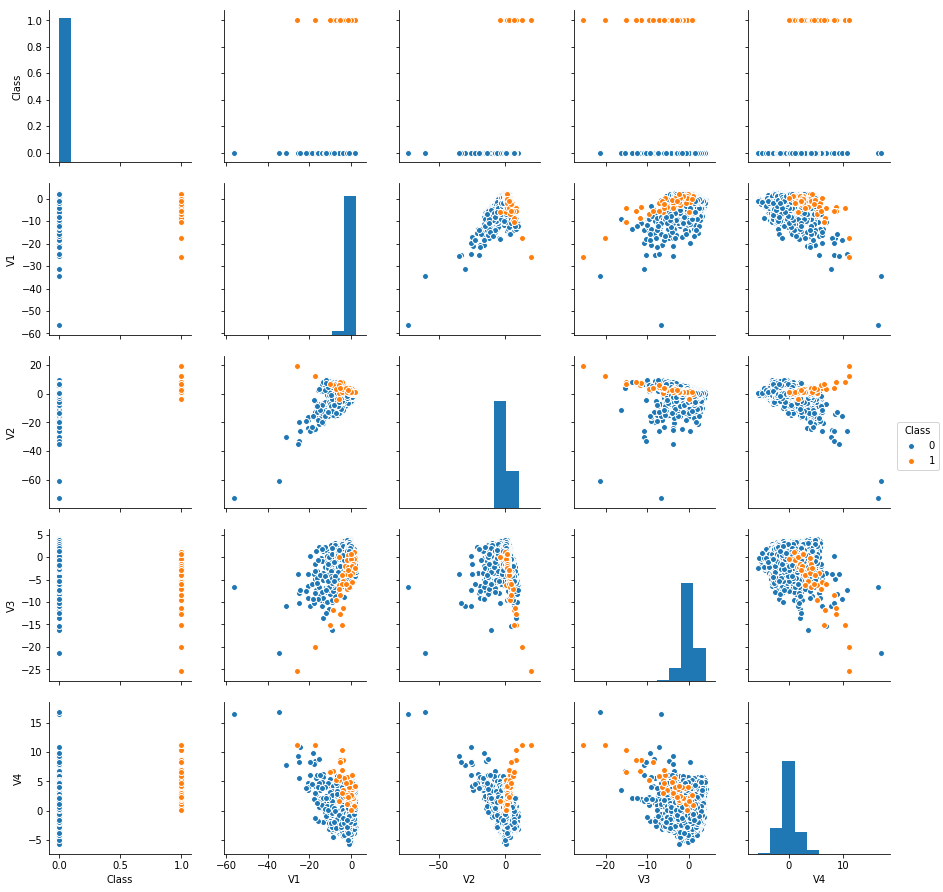

In [10]:
#散布図行列
sns.pairplot(df_sampled[['Class', 'V1','V2','V3','V4']], hue='Class')
plt.show()

Classの値によって, かなり偏りがあるのが見て取れますね. 

データの偏りについてより詳しく見ていくために, 箱ひげ図を出力し分布を確認してみましょう

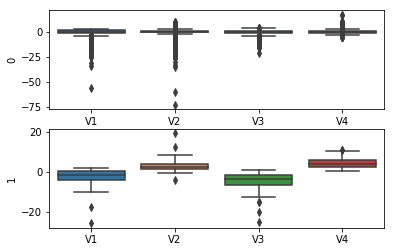

In [11]:
# 箱ひげ図
fig, axes = plt.subplots(2, 1)
for i, (n, g) in enumerate(df_sampled[['Class','V1','V2','V3', 'V4']].groupby('Class')):
    sns.boxplot(data=g.iloc[:, 1:], ax=axes[i])
    axes[i].set_ylabel(n)
plt.show()

可視化によって, データそのものがどのような性質を持っているのか理解する手助けになります. 例えば, 散布図を見ると[外れ値](https://ja.wikipedia.org/wiki/%E5%A4%96%E3%82%8C%E5%80%A4) が見て取れます. 前処理で外れ値を除外するために, 実際に外れ値を検出しましょう.

-----
__練習問題１． scikit-learn を使って外れ値検出を行う__

----

In [12]:
from sklearn.ensemble import IsolationForest

Isolation Forestを使用して外れ値の検出を行う。
- max_sample: 各分類木の学習時にサンプリングする量。floatで与えたなら総データの割合
- contamination: 外れ値と識別する割合
- bootstrap: Trueならブートストラップサンプリングをおこなう

In [13]:
X = df.drop('Class', axis=1).values

In [14]:
clf = IsolationForest(max_samples=1.0, contamination=1e-4, bootstrap=True, n_jobs=-1, verbose=2)
clf.fit(X)

Building estimator 1 of 25 for this parallel run (total 100)...
Building estimator 1 of 25 for this parallel run (total 100)...
Building estimator 1 of 25 for this parallel run (total 100)...
Building estimator 2 of 25 for this parallel run (total 100)...
Building estimator 2 of 25 for this parallel run (total 100)...
Building estimator 1 of 25 for this parallel run (total 100)...
Building estimator 3 of 25 for this parallel run (total 100)...
Building estimator 3 of 25 for this parallel run (total 100)...
Building estimator 2 of 25 for this parallel run (total 100)...
Building estimator 2 of 25 for this parallel run (total 100)...
Building estimator 4 of 25 for this parallel run (total 100)...
Building estimator 4 of 25 for this parallel run (total 100)...
Building estimator 3 of 25 for this parallel run (total 100)...
Building estimator 3 of 25 for this parallel run (total 100)...
Building estimator 5 of 25 for this parallel run (total 100)...
Building estimator 5 of 25 for this para

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    8.1s finished


IsolationForest(bootstrap=True, contamination=0.0001, max_features=1.0,
        max_samples=1.0, n_estimators=100, n_jobs=-1, random_state=None,
        verbose=2)

In [15]:
outlier = clf.predict(X)

df['Outlier'] = outlier

df.loc[(df.Outlier == 1) & (df.Class == 1), 'hue'] = 'Outlier=1, Class=1'
df.loc[(df.Outlier == -1) & (df.Class == 1), 'hue'] = 'Outlier=-1, Class=1'
df.loc[(df.Outlier == 1) & (df.Class == 0), 'hue'] = 'Outlier=1, Class=0'
df.loc[(df.Outlier == -1) & (df.Class == 0), 'hue'] = 'Outlier=-1, Class=0'

In [16]:
df_sampled = df.sample(n=30000, random_state=3)

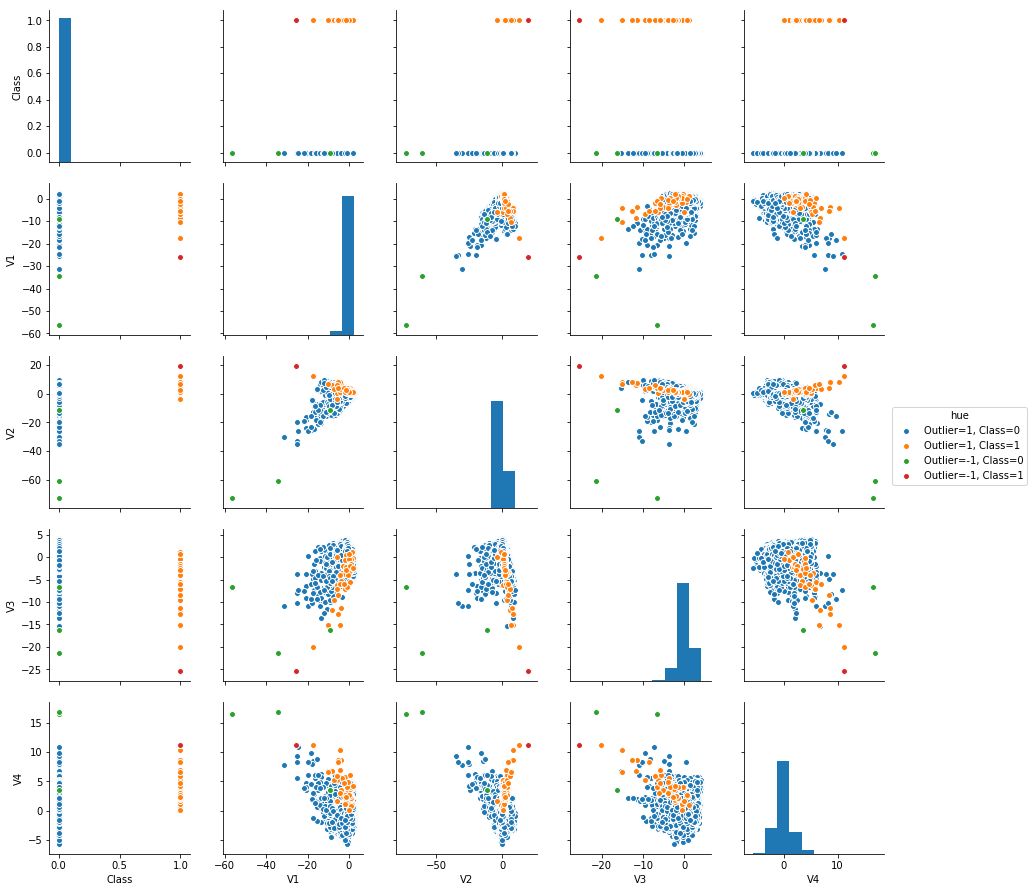

In [17]:
sns.pairplot(df_sampled[['Class', 'V1','V2','V3','V4', 'hue']], hue='hue', vars=['Class', 'V1','V2','V3','V4'])
plt.show()

In [18]:
df_exoutlier = df.loc[df.Outlier == 1]

## 4. データの整形

ここから実際に予測モデルを作るためにデータを整形していきます.

### 特徴量の選択
最初に予測に用いる特徴量を選択します.


今回は簡単にするために __`Time`と V15~のカラムは使いません__ ので, 不要なカラムは削除します

In [19]:
drop_columns = [ 'V{}'.format(i)  for  i  in  range(15,29)] + ['Time', 'Outlier', 'hue']
df_droped = df_exoutlier.drop(drop_columns, axis=1)

### データの分割

全てのデータを学習に使ってしまうと, 学習したデータと同じデータを用いて評価を行うことになり, 正しく学習器の性能を評価することができません.<br>
そこでデータを` トレーニング用/テスト用`に `80%:20%` 分割しましょう.

In [20]:
from sklearn.model_selection import train_test_split

# データをトレーニング用/テスト用に分割
train_df, test_df = train_test_split(df_droped, test_size = 0.2)
# indexをリセットする
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Amount,Class
0,-3.209861,-3.498273,2.314816,0.694053,1.669911,-1.293351,-1.451213,0.518363,1.448935,-0.935257,2.270119,-1.732997,1.550653,1.540536,295.63,0
1,-4.437885,0.637622,-1.703327,0.540550,5.005958,-3.995560,-4.390025,-3.830546,2.013956,1.499367,0.308834,0.057582,-0.390739,-3.043728,1.00,0
2,1.246559,-0.373828,0.903546,-0.721576,-1.241509,-0.833708,-0.596242,-0.013452,1.874226,-1.069582,-0.497507,0.555637,-0.390265,-0.079257,1.00,0
3,2.061025,-0.839974,-1.716405,-0.800196,-0.310541,-1.134975,0.037222,-0.388101,-0.904011,0.932413,1.054923,0.461809,0.215287,0.196074,76.86,0
4,2.034119,-0.038418,-1.160163,0.205164,0.204938,-0.589611,0.135943,-0.204328,0.134144,0.201344,0.904165,1.631250,1.146925,0.236331,1.98,0


### 特徴量の変換

`Class` カラム以外の各カラムを正規化 ( 訓練データ内の平均が0, 分散が1となるように変換) しましょう. 

- `from sklearn import preprocessing` を使って訓練データ内の平均と分散を計算 `.fit` メソッド.
- それを用いてtrain/testの対応カラムを変換

In [21]:
from sklearn import preprocessing

# 各カラムごとに正規化する
for column_name in train_df.columns:    
    # Classカラムは正規化しない
    if column_name == 'Class':
        continue
        
    # 指定されたカラムを抽出
    train_column = train_df[column_name]
    test_column = test_df[column_name]
    
    # trainを用いて平均と分散を計算する
    scaler = preprocessing.StandardScaler().fit(train_column.values.reshape(-1, 1))
    #  正規化
    train_df.loc[:, column_name] = scaler.transform(train_column.values.reshape(-1, 1))
    test_df.loc[:, column_name] = scaler.transform(test_column.values.reshape(-1, 1))

In [22]:
# 正規化済みのデータを保存しておきましょう
train_df.to_csv('train.csv')
test_df.to_csv('test.csv')

### 不均衡性への対策
データ内容の確認の際に少し触れた不均衡性についての対策をしておきます. 「不均衡データに対してはこれをやれば良い」と言う正解は存在しませんが, ここではダウンサンプリングを行います.

ダウンサンプリングとは, 多いラベルのデータの数をランダムにサンプリングして少ない方のラベルのデータ数に合わせる手法です.

In [23]:
np.random.seed(seed=2)

# 分離する
zero_df = train_df[train_df.Class == 0].reset_index(drop = True)
one_df = train_df[train_df.Class == 1].reset_index(drop = True)
one_num = len(one_df)

# ランダムにサンプリングする
zero_df = zero_df.take(np.random.permutation(len(zero_df)))
zero_df = zero_df.iloc[:one_num, :].reset_index(drop = True)

# mergeする
df_downsampled = pd.concat([one_df,zero_df])

# 数の確認
df_downsampled.groupby('Class').size()

Class
0    379
1    379
dtype: int64

In [24]:
df_downsampled = df_downsampled.take(np.random.permutation(len(df_downsampled)))
# ダウンサンプリング済みのデータも保存しておきましょう
df_downsampled.to_csv('downsampled_train.csv')

----- 

## 5. モデルの作成と精度評価

### モデルの作成

ここまでで基本的な前処理が終わったので, モデルの作成に入っていきます.

まずデータをscikit-learnのモデルに当てはめるために, pandas.DataFrameをnumpy.arrayに変換します.

In [25]:
X_train = df_downsampled.drop('Class', axis=1).values
y_train = df_downsampled['Class'].values

X_test = test_df.drop('Class', axis=1).values
y_test = test_df['Class'].values

今回はロジスティック回帰を使ってモデルを生成してみましょう

In [26]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 精度評価

学習が終わったところで, テストデータ上で精度評価をします.

分類問題における精度評価指標は様々ありま. 弊社の[このブログ記事](http://data.gunosy.io/entry/2016/08/05/115345)　が参考になるかと思います.

scikit-learnの `classification_report` を用いることで一通り評価する事ができます

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, logistic.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99     56849
          1       0.06      0.87      0.11       107

avg / total       1.00      0.97      0.98     56956



[__混合行列__ ](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)でも可視化してみましょう<br>
※上記リンクで掲載されているサンプルコードを使用しています

Confusion matrix, without normalization
[[55340  1509]
 [   14    93]]
Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.13  0.87]]


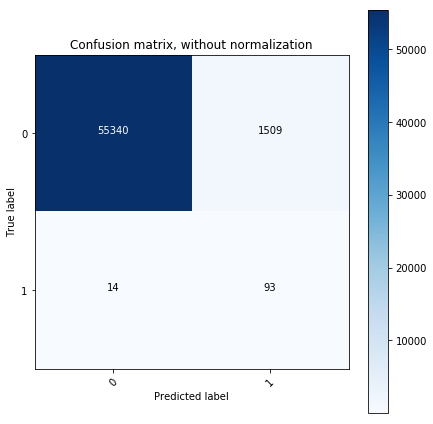

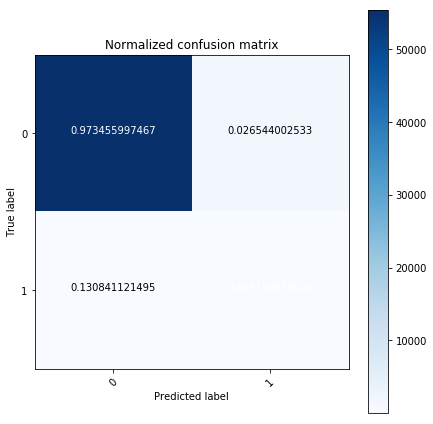

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, logistic.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(2)],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(2)], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

ご覧の通り, 精度は非常に悪いです. 読者の皆様にはインターン本番に向けてより理解を深めてほしいため, 練習問題を幾つか提示します

これらの練習問題をこなすことでインターン本番でも楽しみながら課題に取り組むことができるでしょう. 

----

__練習問題2． ダウンサンプリングを行わず学習させる__

__練習問題3． 別のモデルを試す__

__練習問題4． scikit-learnでクロスバリデーションを行う__

----

### オーバーサンプリングを行う

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
X_train = train_df.drop('Class', axis=1).values
y_train = train_df['Class'].values

sm = SMOTE(random_state=3, ratio = 'auto', k_neighbors=5)
X_res, y_res = sm.fit_sample(X_train, y_train)

In [31]:
np.bincount(y_res)

array([227443, 227443])

In [32]:
logistic2 = LogisticRegression()
logistic2.fit(X_res, y_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
print(classification_report(y_test, logistic2.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99     56849
          1       0.06      0.88      0.11       107

avg / total       1.00      0.97      0.98     56956



Confusion matrix, without normalization
[[55337  1512]
 [   13    94]]
Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.12  0.88]]


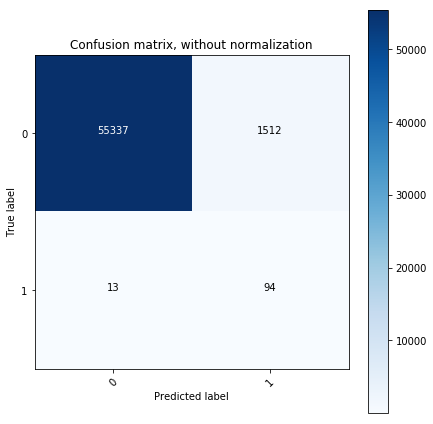

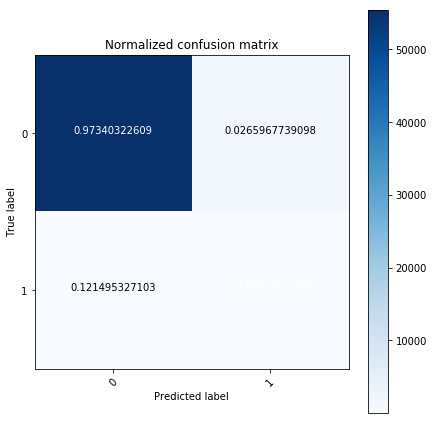

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, logistic2.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(2)],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(2)], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Class 重み付きSVM, Class 重み付きRandom Forest

In [35]:
from sklearn import svm

In [36]:
np.bincount(y_train)

array([227443,    379])

In [37]:
wclf = svm.SVC(kernel='linear', class_weight={1: 10}, verbose=2)
wclf.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight={1: 10}, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=2)

In [38]:
print(classification_report(y_test, wclf.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56849
          1       0.81      0.77      0.79       107

avg / total       1.00      1.00      1.00     56956



Confusion matrix, without normalization
[[56830    19]
 [   25    82]]
Normalized confusion matrix
[[  1.00e+00   3.34e-04]
 [  2.34e-01   7.66e-01]]


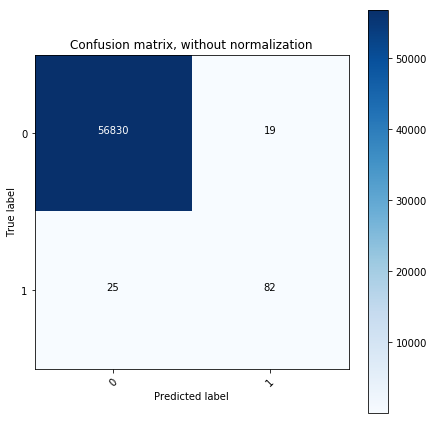

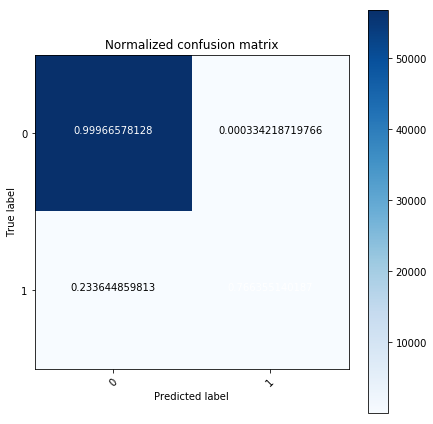

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, wclf.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(2)],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(2)], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight={1: 10}, verbose=2)
rf.fit(X_train, y_train)

building tree 1 of 100building tree 3 of 100building tree 2 of 100building tree 4 of 100



building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 22 of 100building tree 21 of 100

building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.9s


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   56.0s finished


RandomForestClassifier(bootstrap=True, class_weight={1: 10}, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=2, warm_start=False)

In [42]:
print(classification_report(y_test, rf.predict(X_test)))

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56849
          1       0.99      0.72      0.83       107

avg / total       1.00      1.00      1.00     56956



[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


Confusion matrix, without normalization
[[56848     1]
 [   30    77]]
Normalized confusion matrix
[[  1.00e+00   1.76e-05]
 [  2.80e-01   7.20e-01]]


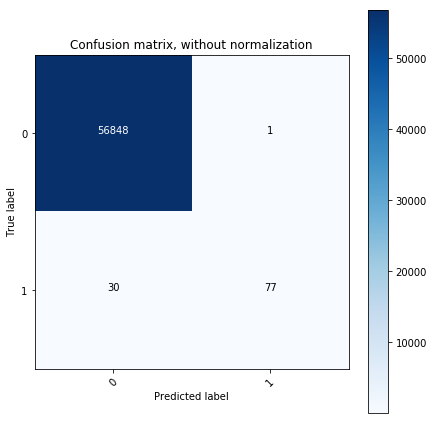

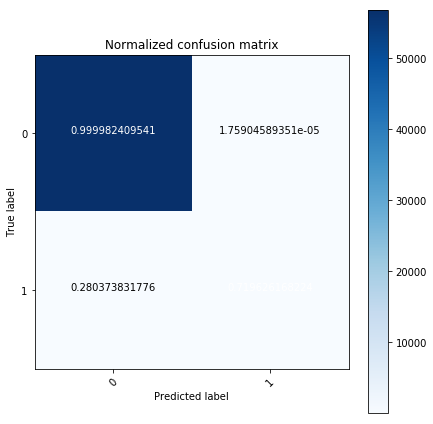

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(2)],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(2)], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### クロスバリデーション

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
parameters = [
    {'C': [1, 10], 'kernel': ['linear'], 'class_weight': [{1: 10}, {1:20}, {1: 50}]},
    {'C': [1, 10], 'kernel': ['rbf'], 'class_weight': [{1: 10}, {1:20}, {1: 50}]},
    {'C': [1, 10], 'kernel': ['poly'], 'degree': [2, 3], 'class_weight': [{1: 10}, {1:20}, {1: 50}]}
    ]

In [46]:
clf = GridSearchCV(
    svm.SVC(),
    parameters,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2)

In [47]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1, class_weight={1: 10}, kernel=linear ........................
[CV] C=1, class_weight={1: 10}, kernel=linear ........................
[CV] C=1, class_weight={1: 10}, kernel=linear ........................
[CV] C=1, class_weight={1: 10}, kernel=linear ........................
[CV] ......... C=1, class_weight={1: 10}, kernel=linear, total= 4.4min
[CV] C=1, class_weight={1: 10}, kernel=linear ........................
[CV] ......... C=1, class_weight={1: 10}, kernel=linear, total= 4.4min
[CV] C=1, class_weight={1: 20}, kernel=linear ........................
[CV] ......... C=1, class_weight={1: 10}, kernel=linear, total= 4.5min
[CV] C=1, class_weight={1: 20}, kernel=linear ........................
[CV] ......... C=1, class_weight={1: 10}, kernel=linear, total= 4.5min
[CV] C=1, class_weight={1: 20}, kernel=linear ........................
[CV] ......... C=1, class_weight={1: 10}, kernel=linear, total= 2.9min
[CV] C=1, class

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 211.4min


[CV] ............ C=1, class_weight={1: 20}, kernel=rbf, total= 1.8min
[CV] C=1, class_weight={1: 20}, kernel=rbf ...........................
[CV] ............ C=1, class_weight={1: 20}, kernel=rbf, total= 1.8min
[CV] C=1, class_weight={1: 20}, kernel=rbf ...........................
[CV] ............ C=1, class_weight={1: 20}, kernel=rbf, total= 1.8min
[CV] C=1, class_weight={1: 20}, kernel=rbf ...........................
[CV] ............ C=1, class_weight={1: 20}, kernel=rbf, total= 1.9min
[CV] C=1, class_weight={1: 50}, kernel=rbf ...........................
[CV] ............ C=1, class_weight={1: 20}, kernel=rbf, total= 1.8min
[CV] C=1, class_weight={1: 50}, kernel=rbf ...........................
[CV] ............ C=1, class_weight={1: 50}, kernel=rbf, total= 1.9min
[CV] C=1, class_weight={1: 50}, kernel=rbf ...........................
[CV] ............ C=1, class_weight={1: 50}, kernel=rbf, total= 1.9min
[CV] C=1, class_weight={1: 50}, kernel=rbf ...........................
[CV] .

[CV]  C=10, class_weight={1: 10}, degree=2, kernel=poly, total= 7.7min
[CV] C=10, class_weight={1: 10}, degree=3, kernel=poly ...............
[CV]  C=10, class_weight={1: 10}, degree=2, kernel=poly, total= 9.2min
[CV] C=10, class_weight={1: 10}, degree=3, kernel=poly ...............
[CV]  C=10, class_weight={1: 10}, degree=2, kernel=poly, total= 5.6min
[CV] C=10, class_weight={1: 10}, degree=3, kernel=poly ...............
[CV]  C=10, class_weight={1: 10}, degree=3, kernel=poly, total= 7.5min
[CV] C=10, class_weight={1: 10}, degree=3, kernel=poly ...............
[CV]  C=10, class_weight={1: 10}, degree=2, kernel=poly, total= 8.3min
[CV] C=10, class_weight={1: 10}, degree=3, kernel=poly ...............
[CV]  C=10, class_weight={1: 10}, degree=3, kernel=poly, total= 9.6min
[CV] C=10, class_weight={1: 20}, degree=2, kernel=poly ...............
[CV]  C=10, class_weight={1: 10}, degree=3, kernel=poly, total= 8.1min
[CV] C=10, class_weight={1: 20}, degree=2, kernel=poly ...............
[CV]  

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 336.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10], 'kernel': ['linear'], 'class_weight': [{1: 10}, {1: 20}, {1: 50}]}, {'C': [1, 10], 'kernel': ['rbf'], 'class_weight': [{1: 10}, {1: 20}, {1: 50}]}, {'C': [1, 10], 'kernel': ['poly'], 'degree': [2, 3], 'class_weight': [{1: 10}, {1: 20}, {1: 50}]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_weighted', verbose=2)

In [48]:
print("# Tuning hyper-parameters for f1_weighted")
print()
print("Best parameters set found on development set: %s" % clf.best_params_)
print()

# それぞれのパラメータでの試行結果の表示
print("Grid scores on development set:")
print()
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
          % (mean_score, scores.std() * 2, params))
print()

# テストデータセットでの分類精度を表示
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

# Tuning hyper-parameters for f1_weighted

Best parameters set found on development set: {'C': 1, 'class_weight': {1: 10}, 'kernel': 'rbf'}

Grid scores on development set:

0.999 (+/-0.000) for {'C': 1, 'class_weight': {1: 10}, 'kernel': 'linear'}
0.999 (+/-0.000) for {'C': 1, 'class_weight': {1: 20}, 'kernel': 'linear'}
0.999 (+/-0.000) for {'C': 1, 'class_weight': {1: 50}, 'kernel': 'linear'}
0.999 (+/-0.000) for {'C': 10, 'class_weight': {1: 10}, 'kernel': 'linear'}
0.999 (+/-0.000) for {'C': 10, 'class_weight': {1: 20}, 'kernel': 'linear'}
0.999 (+/-0.000) for {'C': 10, 'class_weight': {1: 50}, 'kernel': 'linear'}
0.999 (+/-0.000) for {'C': 1, 'class_weight': {1: 10}, 'kernel': 'rbf'}
0.999 (+/-0.000) for {'C': 1, 'class_weight': {1: 20}, 'kernel': 'rbf'}
0.999 (+/-0.000) for {'C': 1, 'class_weight': {1: 50}, 'kernel': 'rbf'}
0.999 (+/-0.000) for {'C': 10, 'class_weight': {1: 10}, 'kernel': 'rbf'}
0.999 (+/-0.000) for {'C': 10, 'class_weight': {1: 20}, 'kernel': 'rbf'}
0.999 (+/-0

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56849
          1       0.93      0.74      0.82       107

avg / total       1.00      1.00      1.00     56956



Confusion matrix, without normalization
[[56843     6]
 [   28    79]]
Normalized confusion matrix
[[  1.00e+00   1.06e-04]
 [  2.62e-01   7.38e-01]]


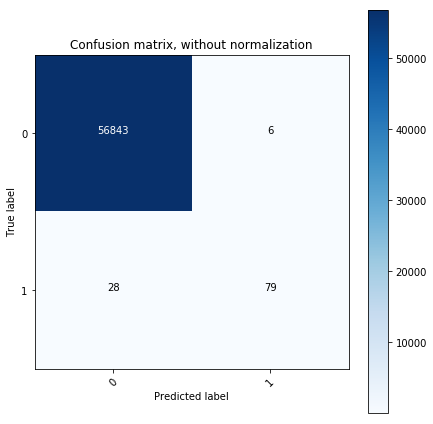

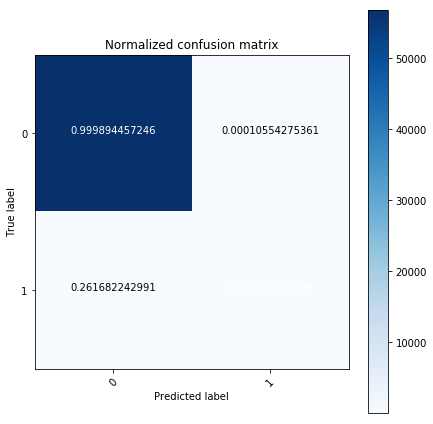

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(2)],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(2)], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## 6. 作成したモデルによる新データの分類


ノートブック上でモデルを生成するだけでは, 実際のサービスに応用することはできません.<br>
生成したモデルを用いて, 日々新しく生成されるデータを如何にして`早く・正確`に分類・予測するかも非常に重要です.<br>
最後に上記で作成したモデルを用いて, 新データの不正検出を行ってみましょう.

#### データ整形・学習済モデルのシリアライズ
新データに対して適用するために, 作成したモデル及び正規化するためのオブジェクトをシリアライズします.

In [50]:
import pickle

MODEL_PATH = 'classifier_model.bin'
SCALER_PATH = 'scaler.bin'

# データ整形時カラムごとに正規化を行う必要があるため, カラムごとに分散・平均値等をシリアライズし, 再利用できるようにします
scalers = {}
for column_name in df_droped.columns:    
    # Classカラムは正規化しない
    if column_name == 'Class':
        continue
    # 指定されたカラムを抽出
    train_column = df_droped[column_name]
    # trainを用いて平均と分散を計算する
    # 計算結果をカラムごとにdictに格納する
    scalers[column_name] = preprocessing.StandardScaler().fit(train_column.values.reshape(-1, 1))

# 再利用できるようシリアライズします
with open(SCALER_PATH, 'wb') as fp:
    fp.write(pickle.dumps(scalers))

In [51]:
# 学習済みモデルについても同様にシリアライズし, 再利用できるようにします
model = logistic.fit(X_train, y_train)
with open(MODEL_PATH, 'wb') as fp:
    fp.write(pickle.dumps(model))

ではシリアライズした学習済モデル等をロードし, 新データの不正検出をしてみましょう.

In [52]:
class Predictor(object):
    def __init__(self):
        self.model = None
        self.scaler = None
        
    def _load_scaler(self):
        """ カラム毎の平均・分散を保持するオブジェクトをロードする"""
        with open(SCALER_PATH, 'rb') as fp:
            self.scaler = pickle.loads(fp.read())
    
    def _load_model(self):
        """ 学習済みのモデルオブジェクトをロードする"""
        with open(MODEL_PATH, 'rb') as fp:
            self.model = pickle.loads(fp.read())
            
    def _normalize(self, df):
        """ 正規化する"""
        # オブジェクトをロードする
        if self.scaler is None:
            self._load_scaler()
        for column_name in df.columns:
            column_df = df[column_name]
            df.loc[:, column_name] = self.scaler[column_name].transform(column_df.values.reshape(-1, 1))
        return df
                  
    def _predict(self, df):
        """ データを整形し, 学習済みのモデルを用いて不正かどうかを分類"""
        # 今回は講座内容に沿って, pandasのDataFrameに新データが格納されているとします
        # まずモデル生成時と同様にデータを整形します
        # 不要なカラムを除く
        drop_columns = [ 'V{}'.format(i)  for  i  in  range(15,29)] + ['Time']
        df = df.drop(drop_columns, axis=1)
        # 正規化
        normalized_df = self._normalize(df)
        # 分類
        if self.model is None:
            self._load_model()
        X = normalized_df.values
        Y = self.model.predict(X)
        
        # index と分類結果をdict形式で返す
        predicts = {}
        for x, y in zip(normalized_df.index, Y):
            predicts[x] = y
        return predicts

In [53]:
# 今回は既にトレーニングデータとして使用したデータ数行を, 新データと見立てて不正検出してみます
new_df = pd.read_csv('creditcard.csv').iloc[:10]
new_df = new_df.drop('Class', axis=1)
# 分類
Predictor()._predict(new_df)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

学習済のモデルを用いて, 新データに対しても不正検出を行うことができました

## 7. 終わりに 


インターンシップ本番では, Gunosyが日々蓄積しているデータを用いて, `実際に適用されうる, 生かされる課題`を分析し課題解決を目指して頂きます. そのため精度向上を狙うだけでなく, 一連のプロセスも自分で再現出来るようになって頂きたいです. そのためには別のデータセットに対してこの教科書のデータ分析プロセスを実行してみましょう.例えばKaggleにある他の分類問題のデータセットに取り組むと良いでしょう

https://www.kaggle.com/datasets

#### ※  インターンシップ本番は別の題材です

教科書はこれで終了になります. インターン本番で本領を発揮できるよう`グノシーアプリの研究`もしっかり行っておいて下さい！<br>
皆様とインターンシップでお会いできることを楽しみにしています！

### 参考文献

- numpy x 機械学習
    - しましま先生の資料: http://www.kamishima.net/mlmpyja/
- pandas
    - 入門: http://www.yunabe.jp/docs/pandas_basics.html
    - tips: http://data.gunosy.io/entry/pandas-pratical-analysis
- kaggleカーネル
    - https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now